In [1]:
#%matplotlib inline

# Dependencies
import numpy as pd 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as sts
from sqlalchemy import create_engine

from config import password


In [2]:
#engine = create_engine('postgresql://tweach@127.0.0.1:52578')
psql_string = 'postgresql://postgres:' + password + '@localhost:5432/employeeDB'
engine=create_engine(psql_string)


In [3]:
connection = engine.connect()

In [4]:
# Employee table
employeeSQL = 'SELECT * FROM "Employees"'
employee_df = pd.read_sql_query(employeeSQL, engine)
employee_df

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [5]:
# Create a histogram to visualize the most common salary ranges for employees.
# Select salaries from Salaries table
salariesSQL = 'SELECT * FROM "Salaries"'
salary_df = pd.read_sql_query(salariesSQL, engine)
salary_data = salary_df['salary']


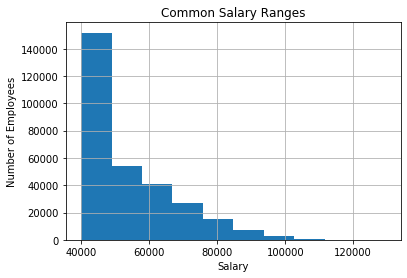

In [6]:
#plt.hist(salary_data)
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
hist = salary_data.hist(bins=10)
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")
plt.show()

In [7]:
# Bar chart of average salary by title.
# create dataframe for titles and salaries
titles_sql = 'select a.emp_no, b.title, c.salary from "Employees" as a, "Titles" as b,"Salaries" as c where a.emp_title = b.title_id and a.emp_no = c.emp_no' 
titles_df = pd.read_sql_query(titles_sql, engine)
titles_df

,emp_no,title,salary
0,10005,Staff,78228
1,10010,Engineer,72488
2,10011,Staff,42365
3,10018,Senior Engineer,55881
4,10035,Senior Engineer,41538
...,...,...,...
300019,499963,Senior Engineer,49383
300020,499972,Senior Engineer,41002
300021,499985,Staff,40000
300022,499987,Staff,52282


In [8]:
# Average salaries by title
avg_salaries = titles_df.groupby(["title"]).mean()["salary"]
avg_salaries

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

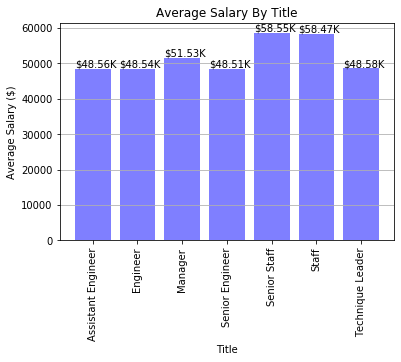

In [9]:
# Plot the Barchart
title_list = avg_salaries.index
avg_salary_by_title = avg_salaries.values

x_axis = np.arange(len(title_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list, rotation=90)
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis="y")
chart = plt.bar(x_axis, avg_salary_by_title, color="b", alpha=0.5, align="center")

for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
plt.savefig("Average Salary By Title.png")    
plt.show()